# **Survival Rate of Passengers of the RMS Titanic in 1912 – A Data Visualization Portfolio Project**  

The sinking of the RMS Titanic in 1912 remains one of history’s most tragic maritime disasters. Though deemed unsinkable, the ship was ill-prepared for an emergency, lacking sufficient lifeboats and a trained crew capable of managing an orderly evacuation. This failure contributed to a devastating loss of life, disproportionately affecting certain passenger groups.  

This project analyzes the survival rate of Titanic passengers, using historical data to uncover patterns in demographics, ticket class, and other factors that influenced survival outcomes. Through data visualization, I explore key questions such as:  

- What was the age distribution of the passengers onboard?  
- From which port did they embark?  
- How many passengers were in each class, and what was the average fare?  
- What were the survival rates based on age, gender, and class?  
- How do survival rates align with historical accounts of the disaster?  
- Which families were torn apart by this tragedy?  

By transforming raw data into meaningful insights, this project brings a new perspective to the human stories behind the numbers.  


### Import Libraries

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Load and Inspect Data

The dataset contains detailed information on each passenger who boarded the RMS Titanic

In [40]:
titanic_pass_df = pd.read_csv('TitanicDisaster.csv')
print(titanic_pass_df.info())
titanic_pass_df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Quick Observations made:
- We have information whether the passenger survived or not, what passenger class they belong to and also where they embarked from.
- Age and gender of each passenger is also available to analyse and also if passengers were traveling with family

## Data Clean Up and Preparation

I first cleaned up and preped data for analysis. Certain data and columns were dropped which dont help in analyzing passenger information and in  general, overview and survival rate.

Cabin and PassengerId: This data will not help analyse or give insight to our main objective so hence are dropped.

In [41]:
# Drop unnecessary columns
titanic_pass_df.drop(['PassengerId', 'Cabin'], axis=1, inplace=True)

Sibip and Parch: Data in these two columns will be merged to give us the Family Size inclusive of the passenger for further analysis on how families were torn apart by the tragedy.

In [42]:
# Create FamilySize and insert it before dropping SibSp and Parch
titanic_pass_df.insert(
    titanic_pass_df.columns.get_loc('SibSp'),
    'FamilySize',
    titanic_pass_df['SibSp'] + titanic_pass_df['Parch'] + 1
)

# Drop the original SibSp and Parch columns
titanic_pass_df.drop(['SibSp', 'Parch'], axis=1, inplace=True)

# Preview the updated DataFrame
titanic_pass_df.head()

,Survived,Pclass,Name,Sex,Age,FamilySize,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,2,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,2,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,1,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,2,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,1,373450,8.0500,S


In [43]:
# Drop rows with missing Age or Embarked values in one step
titanic_pass_df.dropna(subset=['Age', 'Embarked'], inplace=True)

# Display updated dataset info
titanic_pass_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    712 non-null    int64  
 1   Pclass      712 non-null    int64  
 2   Name        712 non-null    object 
 3   Sex         712 non-null    object 
 4   Age         712 non-null    float64
 5   FamilySize  712 non-null    int64  
 6   Ticket      712 non-null    object 
 7   Fare        712 non-null    float64
 8   Embarked    712 non-null    object 
dtypes: float64(2), int64(3), object(4)
memory usage: 55.6+ KB


Fare and Age: Data formatted for more intuitive and simpler analysis.

In [44]:
# Format Fare to two decimal places and convert Age to integer
titanic_pass_df['Fare'] = titanic_pass_df['Fare'].round(2)
titanic_pass_df['Age'] = titanic_pass_df['Age'].astype(int)

# Preview the updated DataFrame
titanic_pass_df.head()

,Survived,Pclass,Name,Sex,Age,FamilySize,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,2,A/5 21171,7.25,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,2,PC 17599,71.28,C
2,1,3,"Heikkinen, Miss. Laina",female,26,1,STON/O2. 3101282,7.92,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,2,113803,53.10,S
4,0,3,"Allen, Mr. William Henry",male,35,1,373450,8.05,S


In [45]:
# Rename columns for clarity
titanic_pass_df.rename(columns={
    'Survived': 'Survived?',
    'Pclass': 'PassengerClass',
    'Embarked': 'EmbarkationPort'
}, inplace=True)

# Map values for better readability
titanic_pass_df['Survived?'] = titanic_pass_df['Survived?'].map({0: 'No', 1: 'Yes'}).astype('string')
titanic_pass_df['PassengerClass'] = titanic_pass_df['PassengerClass'].map({1: '1st', 2: '2nd', 3: '3rd'}).astype('string')
titanic_pass_df['EmbarkationPort'] = titanic_pass_df['EmbarkationPort'].map({
    'S': 'Southampton, UK',
    'C': 'Cherbourg, France',
    'Q': 'Queenstown, Ireland'
})

# Preview the cleaned dataset
titanic_pass_df.head()

,Survived?,PassengerClass,Name,Sex,Age,FamilySize,Ticket,Fare,EmbarkationPort
0,No,3rd,"Braund, Mr. Owen Harris",male,22,2,A/5 21171,7.25,"Southampton, UK"
1,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,2,PC 17599,71.28,"Cherbourg, France"
2,Yes,3rd,"Heikkinen, Miss. Laina",female,26,1,STON/O2. 3101282,7.92,"Southampton, UK"
3,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,2,113803,53.10,"Southampton, UK"
4,No,3rd,"Allen, Mr. William Henry",male,35,1,373450,8.05,"Southampton, UK"


Renaming 'Sex' column to 'Gender' for the sake of avoiding misinterpretation

In [46]:

# Rename 'Sex' to 'Gender' and format values for readability
titanic_pass_df.rename(columns={'Sex': 'Gender'}, inplace=True)
titanic_pass_df['Gender'] = titanic_pass_df['Gender'].str.title()

# Preview the updated DataFrame
titanic_pass_df.head()


,Survived?,PassengerClass,Name,Gender,Age,FamilySize,Ticket,Fare,EmbarkationPort
0,No,3rd,"Braund, Mr. Owen Harris",Male,22,2,A/5 21171,7.25,"Southampton, UK"
1,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,2,PC 17599,71.28,"Cherbourg, France"
2,Yes,3rd,"Heikkinen, Miss. Laina",Female,26,1,STON/O2. 3101282,7.92,"Southampton, UK"
3,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,2,113803,53.10,"Southampton, UK"
4,No,3rd,"Allen, Mr. William Henry",Male,35,1,373450,8.05,"Southampton, UK"


## Data Visualization - Passenger Demographics and other Insights

### Age Distribution of Titanic Passengers

Analyzing the age distribution of Titanic passengers offers a broad view of the ship’s demographic landscape, independent of class or gender. It highlights the predominant age groups on board—be it children, young adults, or seniors—and lays the foundation for more nuanced investigations into survival patterns. Notable peaks or dips in the distribution can uncover insights about the types of travelers and reflect the historical context of early 20th-century transatlantic voyages.

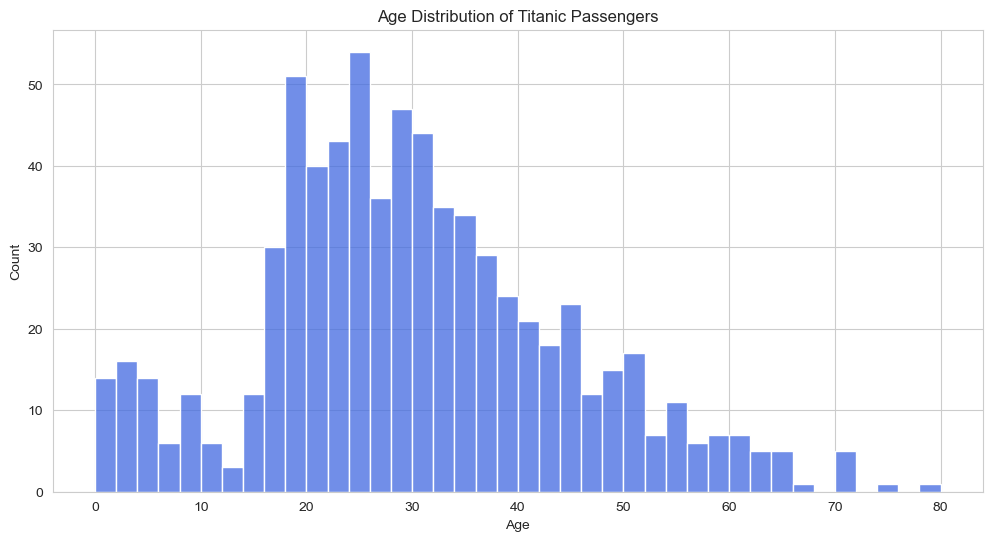

In [47]:

# Set style for the plot
sns.set_style("whitegrid")

# Create the age distribution plot
plt.figure(figsize=(12, 6))
sns.histplot(titanic_pass_df["Age"].dropna(), bins=40, color="royalblue")

# Add labels and title
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Titanic Passengers")

# Show the plot
plt.show()


**Analysis**: The histogram reveals the age profile of Titanic passengers, highlighting which age groups were most represented on board. A noticeable concentration appears among young adults, with fewer children and elderly individuals. These patterns offer valuable insight into the ship’s demographic composition.


### Class Based Fare Distribution and Comparison

Exploring the fare distribution across passenger classes reveals the socioeconomic stratification aboard the Titanic. Visualiztion has been illustrated on how ticket prices varied significantly between 1st, 2nd, and 3rd class. The clear separation between classes underscores the economic divide of the era and provides a foundation for deeper analysis into how wealth and class may have influenced survival outcomes. Outliers and clustering patterns offer further insight into travel behaviors and the historical context of early 20th-century maritime travel.

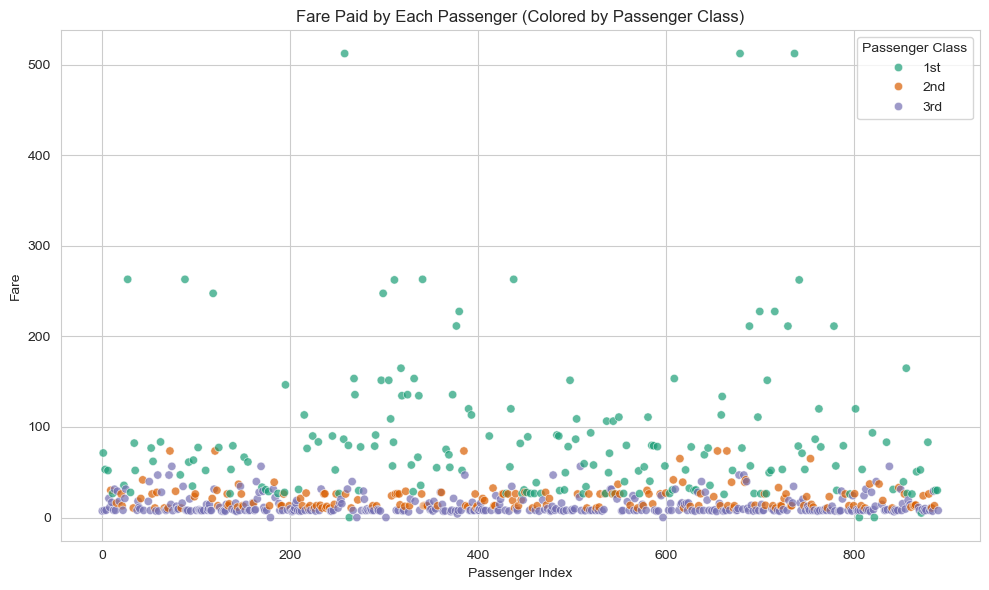

In [48]:
# Define the desired order
class_order = ['1st', '2nd', '3rd']

# Plot with specified hue order
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=titanic_pass_df,
    x=titanic_pass_df.index,
    y='Fare',
    hue='PassengerClass',
    hue_order=class_order,
    palette='Dark2',
    alpha=0.7
)

# Add labels and title
plt.title("Fare Paid by Each Passenger (Colored by Passenger Class)")
plt.xlabel("Passenger Index")
plt.ylabel("Fare")
plt.legend(title="Passenger Class")
plt.tight_layout()
plt.show()

**Analysis**: This scatter plot visualizes the relationship between passenger class and fare paid aboard the Titanic. By plotting individual data points, it becomes evident how fare prices varied significantly within each class—especially in 1st class, where luxury accommodations led to a wide range of ticket costs. The plot highlights clear stratification: 1st class fares cluster at higher values, while 2nd and 3rd class fares remain comparatively modest.

### Embarkation Ports

Visualizing the embarkation ports of Titanic passengers provides insight into the geographic origins and boarding patterns of those aboard. 

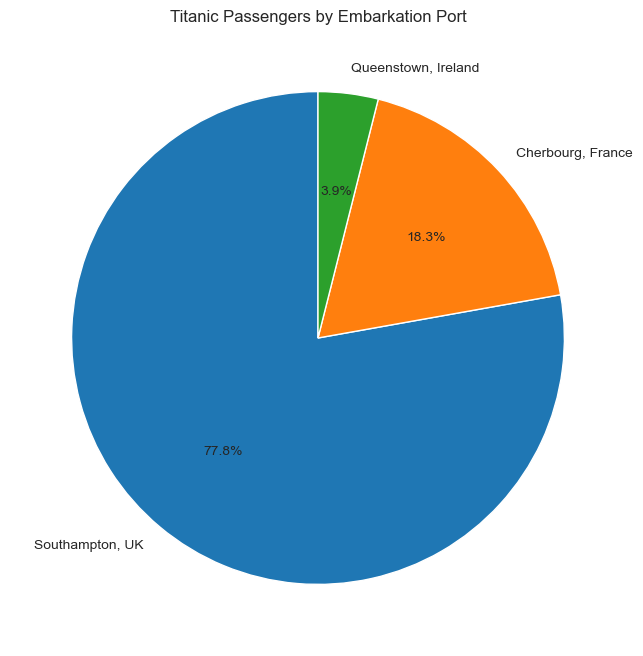

In [49]:
# Count the number of passengers per embarkation port
embark_counts = titanic_pass_df['EmbarkationPort'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8,8))
plt.pie(embark_counts, labels=embark_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Titanic Passengers by Embarkation Port')
plt.show()

**Analysis**: The pie chart highlights the distribution among the three primary ports—Southampton, Cherbourg, and Queenstown ( now Cobh ) — revealing that a majority of passengers boarded at Southampton and also reflects the ship’s route before venturing out into Atlantic to New York City, USA.

## Data Visualization - Survival Rates

Visualizing survival rates aboard the Titanic reveals the stark human cost of the disaster and the systemic factors that shaped who lived and who perished. With lifeboats sufficient for only a fraction of those on board and inadequate evacuation procedures, survival was heavily influenced by gender, age, and class. The “women and children first” protocol contributed to significantly higher survival rates among females and young passengers, while many third-class travelers were unable to reach the lifeboats in time. This analysis offers a sobering look at how social norms, ship design, and emergency preparedness intersected in one of history’s most infamous maritime tragedies.

### Survival Rate based on Passenger Class

Analyzing survival rates across passenger classes reveals the deep social inequalities present aboard the Titanic. This visualization highlights how class status played a critical role in determining survival, reflecting the broader societal structures of the early 20th century and offering a powerful lens through which to understand the human impact of the disaster.

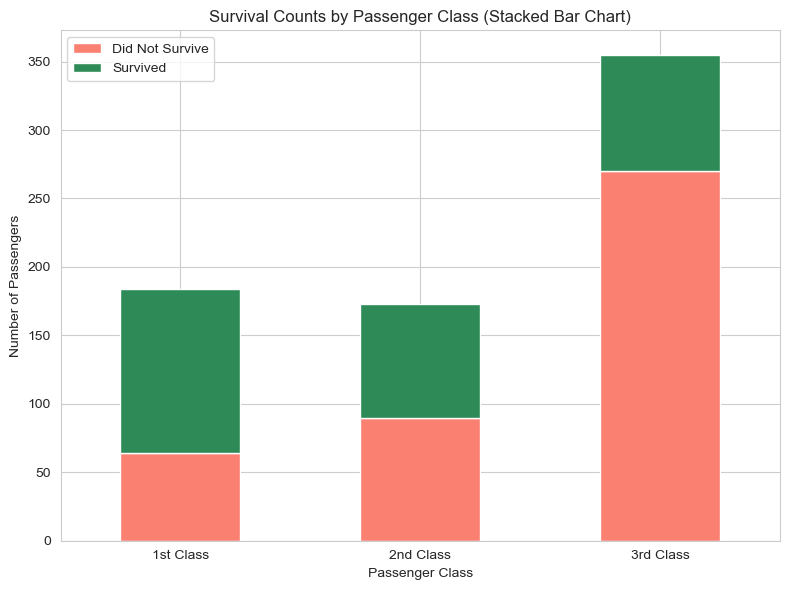

In [50]:

# Count survivors and non-survivors per class using original 'Yes'/'No' labels
survival_counts = titanic_pass_df.groupby(['PassengerClass', 'Survived?']).size().unstack(fill_value=0)

# Plot stacked bar chart
survival_counts.plot(kind='bar', stacked=True, color=['salmon', 'seagreen'], figsize=(8, 6))

# Add labels and title
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.title("Survival Counts by Passenger Class (Stacked Bar Chart)")
plt.legend(['Did Not Survive', 'Survived'])  # Ensure order matches column order
plt.xticks(ticks=[0, 1, 2], labels=['1st Class', '2nd Class', '3rd Class'], rotation=0)

# Show the plot
plt.tight_layout()
plt.show()


**Analysis**:
First-class passengers had the highest survival rate, benefiting from better access to lifeboats and crew assistance. In contrast, third-class passengers faced significant barriers—both physical and social—that limited their chances of escape.


### Survival Rate based on Age group and Gender

Visualizing survival rates by age and gender reveals how social norms and emergency protocols shaped outcomes during the Titanic disaster. 

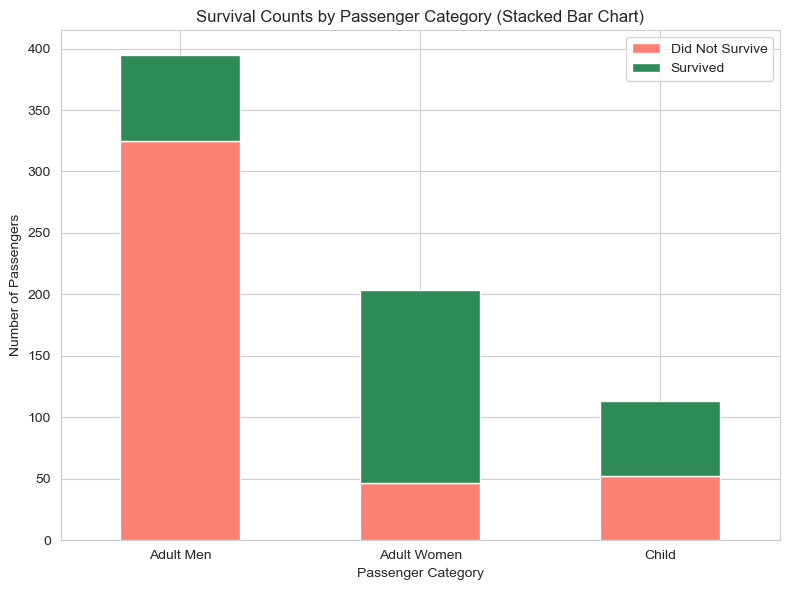

In [51]:
# Define age threshold for children
def categorize_passenger(row):
    if row['Age'] < 18:
        return 'Child'
    elif row['Gender'] == 'Female':
        return 'Adult Women'
    else:
        return 'Adult Men'

titanic_pass_df['Category'] = titanic_pass_df.apply(categorize_passenger, axis=1)

# Count survivors and non-survivors per category using original labels
category_survival = titanic_pass_df.groupby(['Category', 'Survived?']).size().unstack(fill_value=0)

# Plot stacked bar chart
category_survival.plot(kind='bar', stacked=True, color=['salmon', 'seagreen'], figsize=(8, 6))

# Add labels and title
plt.xlabel("Passenger Category")
plt.ylabel("Number of Passengers")
plt.title("Survival Counts by Passenger Category (Stacked Bar Chart)")
plt.legend(['Did Not Survive', 'Survived'])  # Ensure order matches column order
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()

**Analysis**:
Women and children had significantly higher survival rates, reflecting the “women and children first” policy followed during evacuation. Adult men, especially those in third class, faced the lowest chances of survival. This chart highlights how age and gender intersected with access to lifeboats and crew assistance, offering a deeper understanding of the human impact and decision-making during the tragedy.

## Data Visualization - Families embarked which have been torn apart by the disaster

This visualization highlights the emotional toll of the Titanic tragedy by focusing on families who boarded together but were separated by the disaster. Using family-related data—such as the number of siblings, spouses, parents, and children aboard—we can identify groups who traveled as a unit. 

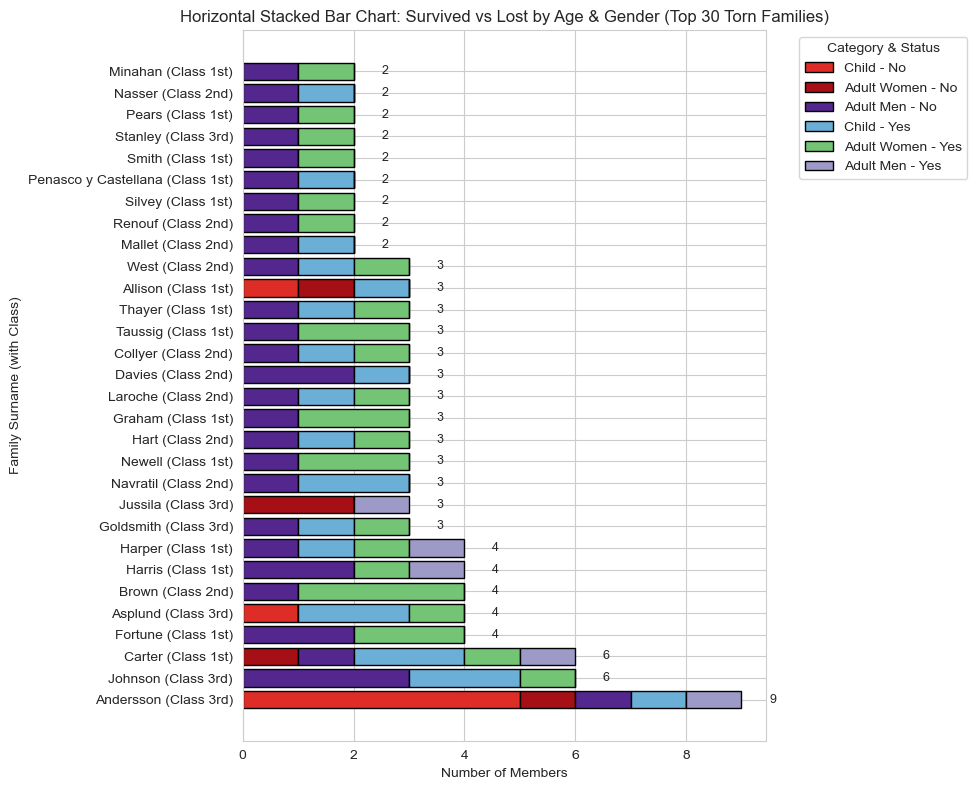

In [52]:
# Extract surname
titanic_pass_df['Surname'] = titanic_pass_df['Name'].apply(lambda x: x.split(',')[0].strip())

# Categorize passengers
def categorize(row):
    if row['Age'] < 18:
        return 'Child'
    elif row['Gender'] == 'Female':
        return 'Adult Women'
    else:
        return 'Adult Men'

titanic_pass_df['Category'] = titanic_pass_df.apply(categorize, axis=1)

# Determine dominant class per family
family_class = titanic_pass_df.groupby('Surname')['PassengerClass'].agg(lambda x: x.mode().iloc[0]).reset_index()
family_class.columns = ['Surname', 'FamilyClass']
family_classes = family_class.set_index('Surname')['FamilyClass']

titanic_pass_df = titanic_pass_df.drop(columns=['FamilyClass'], errors='ignore')
titanic_pass_df = titanic_pass_df.merge(family_class, on='Surname', how='left')

# Filter families with more than one member
family_df = titanic_pass_df.groupby('Surname').filter(lambda x: len(x) > 1)

# Identify torn families
family_summary = family_df.groupby('Surname')['Survived?'].value_counts().unstack(fill_value=0).reset_index()
family_summary['Lost'] = family_summary.get('No', 0)
family_summary['Survived'] = family_summary.get('Yes', 0)
torn_families = family_summary[(family_summary['Survived'] > 0) & (family_summary['Lost'] > 0)]

# Filter original data to only include torn families
torn_df = family_df[family_df['Surname'].isin(torn_families['Surname'])]

# Count survivors and losses by family and category
grouped = torn_df.groupby(['Surname', 'Category', 'Survived?']).size().reset_index(name='Count')
grouped['Label'] = grouped['Category'] + ' - ' + grouped['Survived?']

# Pivot to wide format for stacking
pivot_df = grouped.pivot_table(index='Surname', columns='Label', values='Count', fill_value=0)

# Filter top 30 families by total members
top_families = pivot_df.sum(axis=1).sort_values(ascending=False).head(30).index
plot_df = pivot_df.loc[top_families]

# Define color palette
color_map = {
    'Child - Yes': '#6baed6',       # Soft blue
    'Child - No': '#de2d26',        # Bold red
    'Adult Women - Yes': '#74c476', # Fresh green
    'Adult Women - No': '#a50f15',  # Deep crimson
    'Adult Men - Yes': '#9e9ac8',   # Lavender
    'Adult Men - No': '#54278f'     # Dark purple
}

# Plot horizontal stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))
left = [0] * len(plot_df)
ordered_labels = [label for label in color_map if 'No' in label] + \
                 [label for label in color_map if 'Yes' in label]

for label in ordered_labels:
    if label in plot_df.columns:
        values = plot_df[label]
        ax.barh(plot_df.index, values, left=left, label=label, color=color_map[label], edgecolor='black')
        left = [l + v for l, v in zip(left, values)]

# Add count labels at the end of each bar
for i, surname in enumerate(plot_df.index):
    total = plot_df.loc[surname].sum()
    ax.text(total + 0.5, i, f"{int(total)}", va='center', fontsize=9)

# Final touches
ax.set_title("Horizontal Stacked Bar Chart: Survived vs Lost by Age & Gender (Top 30 Torn Families)")
ax.set_xlabel("Number of Members")
ax.set_ylabel("Family Surname (with Class)")

# Add class info to y-axis labels
tick_labels = [f"{surname} (Class {family_classes.get(surname, 'Unknown')})" for surname in plot_df.index]
ax.set_yticks(range(len(plot_df.index)))
ax.set_yticklabels(tick_labels)

ax.legend(title="Category & Status", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The chart reveals how many of these families experienced loss, with some members surviving while others did not. This analysis brings a deeply human perspective to the data, reminding us that behind every number is a story of connection, separation, and heartbreak.

In the chart above, we see that the surviving part of the families was based in "women and children first" policy. In the case of the Andersson family, the family was torn apart as they were 3rd class passengers who had to fend for themselves.

## **Overall Analysis:**

To conclude, the results highlight how survival was shaped not just by chance, but by decisions influenced by age and gender during the tragedy

In [53]:
# Define groupings
def group_passenger(row):
    if row['Gender'] == 'Female' or row['Age'] < 18:
        return 'Women and Children'
    else:
        return 'Men'

titanic_pass_df['Group'] = titanic_pass_df.apply(group_passenger, axis=1)

# Convert 'Survived?' to numeric if not already done
titanic_pass_df['Survived_numeric'] = titanic_pass_df['Survived?'].map({'Yes': 1, 'No': 0})

# Calculate survival rates
group_stats = titanic_pass_df.groupby('Group')['Survived_numeric'].agg(['sum', 'count'])
group_stats['Survival Rate (%)'] = (group_stats['sum'] / group_stats['count']) * 100

# Display results
print(group_stats[['Survival Rate (%)']].round(2))

                    Survival Rate (%)
Group                                
Men                             17.72
Women and Children              68.77


**Analysis**: Women and children had significantly higher chances of survival compared to men. Calculations reveal that a large proportion of female passengers and younger individuals were rescued, while the majority of adult males did not survive. These figures reflect the “women and children first” evacuation approach that was followed on board.